# Assignment 2 - Forest Fires in Algeria

This notebook aims to analyse the data related to the forest fire observations in two regions of Algeria, with data collected between June 2012 and September 2012.

## 1. Data Collection and understanding

Here are the types of data present in the dataset:
* day - day of the month: 01 to 31
* month - month of the year: 01 to 12
* year - year when the data was captured: 2012
* Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
* RH - relative humidity in %: 21 to 90
* Ws - wind speed in km/h: 6 to 29
* Rain -  total day in mm : 0 to 16.8
* FFMC - FFMC index from the FWI system: 28.6 to 92.5
* DMC - DMC index from the FWI system: 1.1 to 65.9
* DC - DC index from the FWI system: 7 to 220.4
* ISI - ISI index from the FWI system: 0 to 18.5
* BUI - Buildup Index (BUI) index from the FWI system: 1.1 to 68
* FWI - Fire Weather Index (FWI) Index: 0 to 31.1
* Classes: fire or not fire

The project goal is to learn how to classify examples in terms of the concept under analysis given a dataset. We want to determine which weather features are capable of predicting forest fires in these regions using Classification algorithms.

**Required Libraries**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
import bz2,pickle
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier


**Note :** It's necessary to ignore these warnings to prevent errors in the future as we will mention later.

In [2]:
import warnings
warnings.filterwarnings("ignore")

**Read the dataset**

In [3]:
df=pd.read_csv('forestfires.csv',header= 1)
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


In [5]:
df.shape


(246, 14)

## 2. Data cleaning and pre-processing


First we have to clean the dataset: remove missing and null values, check for duplicates, remove unnecessary spaces and switch all the data types from object to either int or float so all the data is organized and contributes equally to the model fitting.

To start, we check the row which has missing values:

In [6]:
df[df.isnull().any(axis=1)] 

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


The null values in row 122 separate our dataset in the **Bejaia Region** and the **Sidi-Bel Abbes Region**. We will create a new column for that, with values **1** and **2** respectively:

In [7]:
df.loc[:122,'Region']=1
df.loc[122:,'Region']=2
df[['Region']] = df[['Region']].astype(int)

Then we remove the **null** rows.

In [8]:
df =df.dropna().reset_index(drop=True) 
df.shape

(244, 15)

**Remove** 122th row:

In [9]:
df = df.drop(122).reset_index(drop=True)
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,1
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,1
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,2
239,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,2
240,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,2
241,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,2


Then we check if there are any **duplicates**:

In [10]:
df.duplicated().sum()

0

After this, we checked the collumn names and realized some of them have **spaces**, so we removed them so that we don't have **errors** when trying to access them:

In [244]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [245]:
df.columns = df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

We then checked the "Classes" collumn for extra spaces and found them too:

In [246]:
df["Classes"].value_counts()

fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: Classes, dtype: int64

So we removed them:

In [247]:
df.Classes = df.Classes.str.strip()
df["Classes"].value_counts()

fire        137
not fire    106
Name: Classes, dtype: int64

Next we atributted the value **0** to "not fire" and **1** to "fire":

In [248]:
df['Classes']= np.where(df['Classes']== 'not fire',0,1)

To finish our data cleaning, we switched the rest of the data types to **int** or **float**, depending on our needs:

In [250]:
df[['month', 'day', 'year', 'Temperature','RH', 'Ws']] = df[['month', 'day', 'year', 'Temperature','RH', 'Ws']].astype(int)
df[['Rain', 'FFMC', 'DMC', 'DC','ISI', 'BUI', 'FWI']] = df[['Rain', 'FFMC', 'DMC', 'DC','ISI', 'BUI', 'FWI']].astype(float)
df.info() 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int32  
 1   month        243 non-null    int32  
 2   year         243 non-null    int32  
 3   Temperature  243 non-null    int32  
 4   RH           243 non-null    int32  
 5   Ws           243 non-null    int32  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    int32  
 14  Region       243 non-null    int32  
dtypes: float64(7), int32(8)
memory usage: 21.0 KB


Now that we have no missing data in the dataset, we can proceed to the **analysis phase**.

## 3.Data Analysis

In [251]:
df.shape

(243, 15)

In [252]:
df.corr()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
day,1.000000,-0.000369,NaN,0.097227,-0.076034,0.047812,-0.112523,0.224956,0.491514,0.527952,0.180543,0.517117,0.350781,0.202840,0.000821
month,-0.000369,1.000000,NaN,-0.056781,-0.041252,-0.039880,0.034822,0.017030,0.067943,0.126511,0.065608,0.085073,0.082639,0.024004,0.001857
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature,0.097227,-0.056781,NaN,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.076034,-0.041252,NaN,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,0.047812,-0.039880,NaN,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.112523,0.034822,NaN,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.224956,0.017030,NaN,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.491514,0.067943,NaN,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.527952,0.126511,NaN,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734


<Axes: >

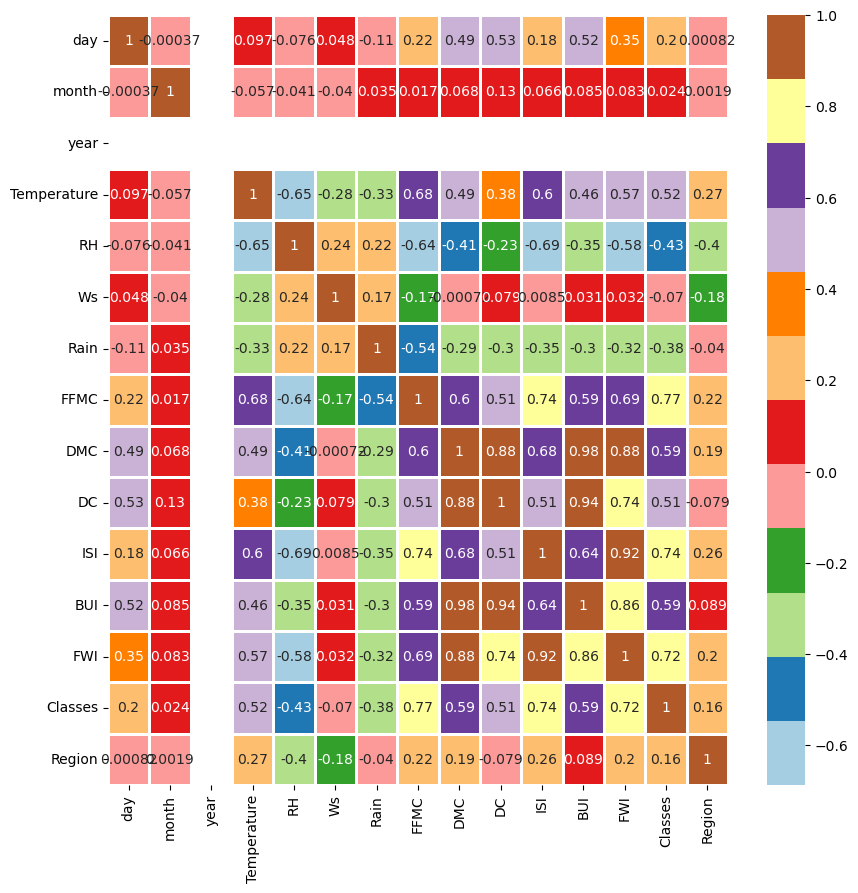

In [254]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),linewidths=2,annot= True,cmap = "Paired")


#### Class distribution

Text(0.5, 1.0, 'Class distribution\n 0-No Fire   1- Fire')

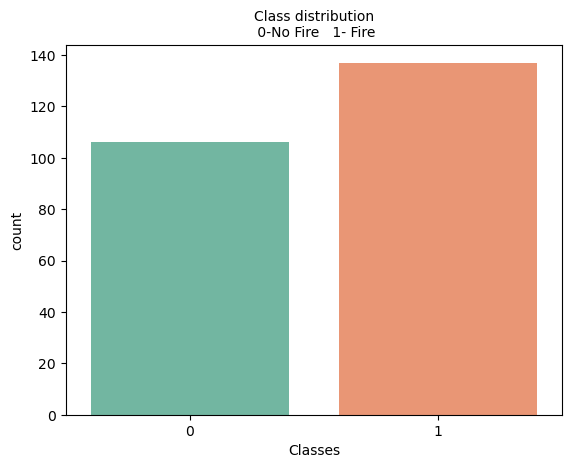

In [255]:
sns.countplot(x='Classes', data=df, palette='Set2')
plt.title('Class distribution\n 0-No Fire   1- Fire', fontsize=10)

**Region analysis**

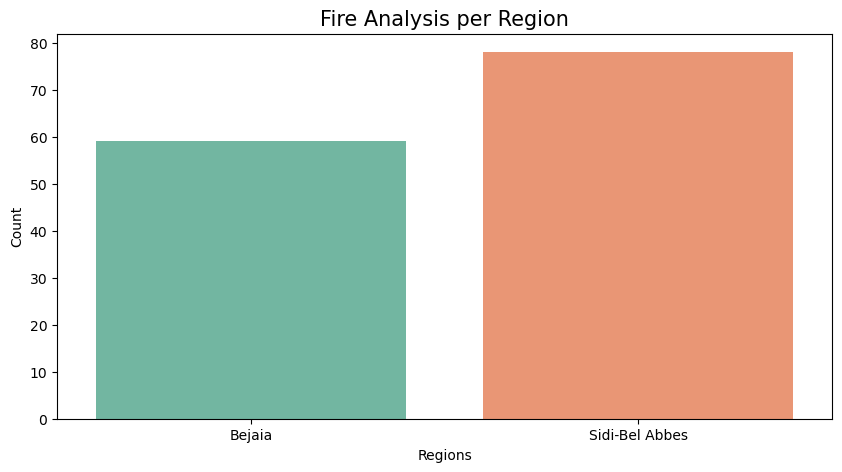

In [256]:
df1 = df[df['Classes'] == 1]
plt.subplots(figsize=(10, 5))
sns.countplot(x='Region', data=df1, palette='Set2') 
plt.title('Fire Analysis per Region', fontsize=15)
plt.xlabel('Regions')
plt.ylabel('Count')
plt.xticks(np.arange(2), ['Bejaia', 'Sidi-Bel Abbes'])
plt.show()

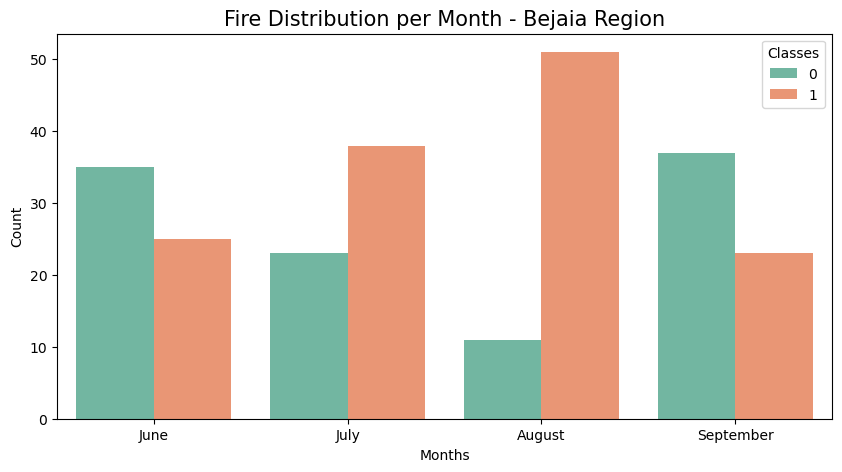

In [257]:
df1= df.loc[df['Region']== 1]
plt.subplots(figsize=(10,5))
sns.countplot(x='month',hue='Classes',data= df, palette= 'Set2')
plt.title('Fire Distribution per Month - Bejaia Region', fontsize=15)
plt.xlabel('Months')
plt.ylabel('Count')
plt.xticks(np.arange(4), ['June','July', 'August', 'September',])
plt.show()

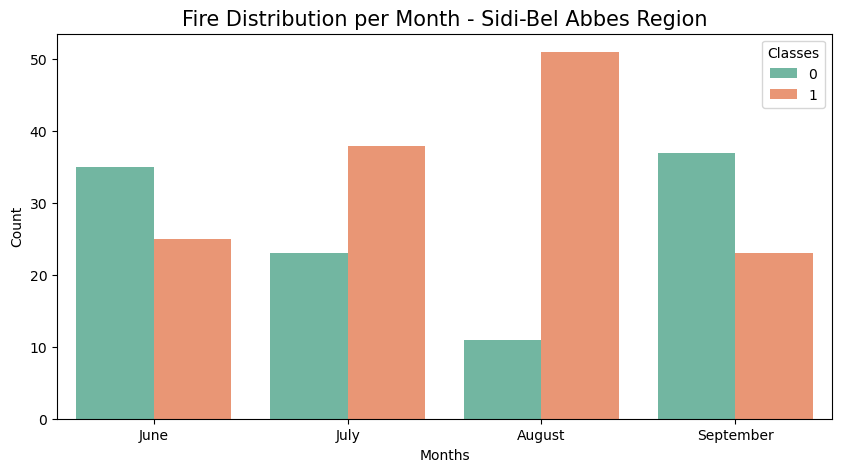

In [258]:
df1= df.loc[df['Region']== 2]
plt.subplots(figsize=(10,5))
sns.countplot(x='month',hue='Classes',data= df, palette= 'Set2')
plt.title('Fire Distribution per Month - Sidi-Bel Abbes Region', fontsize=15)
plt.xlabel('Months')
plt.ylabel('Count')
plt.xticks(np.arange(4), ['June','July', 'August', 'September',])
plt.show()

array([[<Axes: title={'center': 'day'}>,
        <Axes: title={'center': 'month'}>,
        <Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'Temperature'}>],
       [<Axes: title={'center': 'RH'}>, <Axes: title={'center': 'Ws'}>,
        <Axes: title={'center': 'Rain'}>,
        <Axes: title={'center': 'FFMC'}>],
       [<Axes: title={'center': 'DMC'}>, <Axes: title={'center': 'DC'}>,
        <Axes: title={'center': 'ISI'}>, <Axes: title={'center': 'BUI'}>],
       [<Axes: title={'center': 'FWI'}>,
        <Axes: title={'center': 'Classes'}>,
        <Axes: title={'center': 'Region'}>, <Axes: >]], dtype=object)

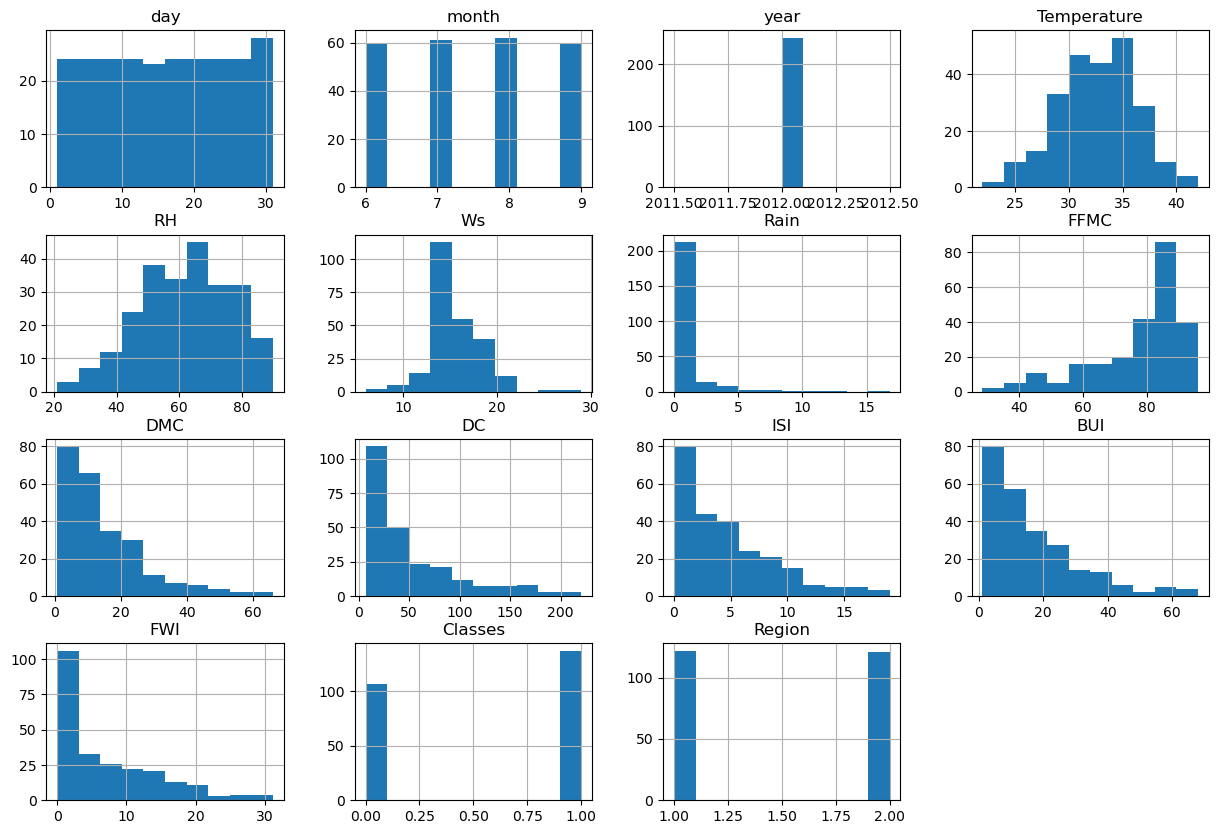

In [259]:
df.hist(figsize=(15,10))

## Classification

In [260]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import time

In [261]:
df2 = df.drop(['day','month','year'], axis=1)

In order to minimize our dataset by removing the features we don´t find relevant for analysis, we removed **day**, **month**, **year**.

Utility function to determine columns with correlation higher than a defined threshold.

In [262]:
def corr(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i, col in enumerate(corr_matrix.columns):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                col_corr.add(col)
    return col_corr

In [263]:
x = df2.iloc[:, 0:10]
y = df2['Classes']

In [264]:
x.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5


In [265]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Classes, dtype: int32

### Separate dataset into train and test

In [266]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=0)
x_train.shape, x_test.shape

((182, 10), (61, 10))

In [267]:
corr_col = corr(x_train, 0.75)
corr_col

{'BUI', 'DC', 'FWI'}

In [268]:
x_train.drop(corr_col,axis=1, inplace=True)
x_test.drop(corr_col,axis=1, inplace=True)
x_train.shape, x_test.shape

((182, 7), (61, 7))

**Scaling**

- Scaling helps to normalize the data so that the features with higher values do not dominate over the features with smaller values.
- It makes sure that each feature is given equal importance during the training process.
- Scaling helps to speed up the training process as it makes it easier for the optimization algorithm to converge.

Taking scaling benefits into account, we decided to apply it to our train and test sets.

In [269]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

### ****Decision Tree****

In [270]:
DT_Classifier = DecisionTreeClassifier()
start_time_dt = time.time()
DT_Classifier.fit(x_train_scaled,y_train)
end_time_dt = time.time()
time_taken_dt = end_time_dt - start_time_dt
print(f"Time taken to train Decision Tree classifier: {time_taken_dt:.5f} seconds")

Time taken to train Decision Tree classifier: 0.00294 seconds


In [271]:
DT_prediction = DT_Classifier.predict(x_test_scaled)
DT_prediction

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1])

##### ***Comparing Expected vs Actual***

In [272]:
predic_act = pd.DataFrame({'Expected': DT_prediction, 'Actual': y_test})
predic_act

,Expected,Actual
110,1,1
150,1,1
37,1,1
75,1,1
109,1,1
71,1,1
122,0,0
73,1,1
154,1,1
234,1,1


Now we are able to determine the **Accuracy** of the **Decision Tree Classifier** and also visualize the evaluation metrics that will be later discussed when comparing model results.

In [273]:
score = accuracy_score(y_test,DT_prediction)
report = classification_report(y_test,DT_prediction)

print("Decision Tree")
print ("Accuracy Obtained: {:.5f}".format(score))
print (report)

Decision Tree
Accuracy Obtained: 1.00000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       1.00      1.00      1.00        35

    accuracy                           1.00        61
   macro avg       1.00      1.00      1.00        61
weighted avg       1.00      1.00      1.00        61



##### Plots and Confusion Matrix Visualization

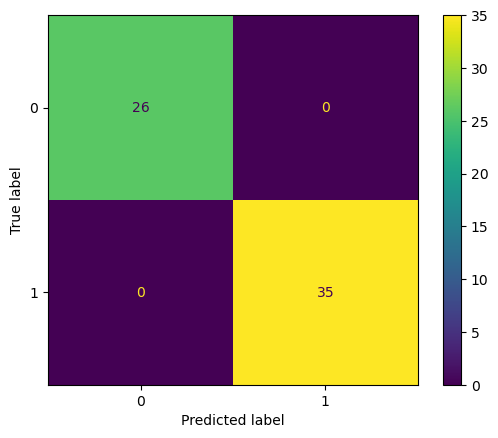

In [274]:
CM = ConfusionMatrixDisplay.from_estimator(DT_Classifier, x_test_scaled, y_test)
CM

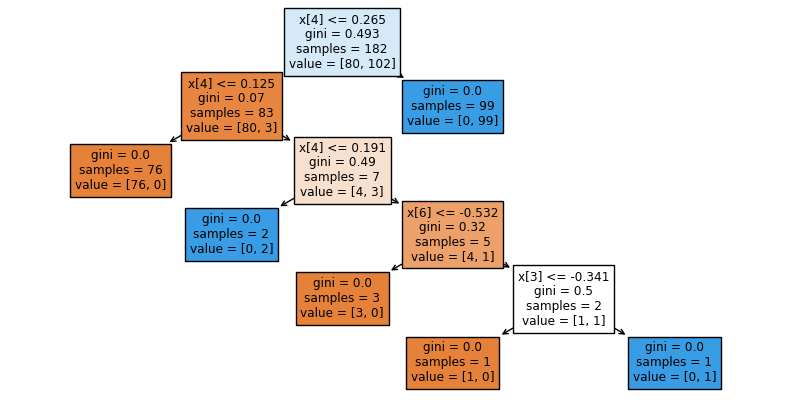

In [275]:
plt.figure(figsize = (10,5))
tree.plot_tree(DT_Classifier,filled = True)
plt.show()

### KNeighbors 

In [276]:
KN_Classifier = KNeighborsClassifier()
start_time_knn = time.time()
KN_Classifier.fit(x_train_scaled,y_train)
end_time_knn = time.time()
time_taken_knn = end_time_knn - start_time_knn
print(f"Time taken to train KNN classifier: {time_taken_knn:.5f} seconds")

Time taken to train KNN classifier: 0.00207 seconds


In [277]:
print("Training Score:",KN_Classifier.score(x_train_scaled, y_train))
print("Test Score:",KN_Classifier.score(x_test_scaled,y_test))

Training Score: 0.9615384615384616
Test Score: 0.9016393442622951


In [278]:
KN_prediction = KN_Classifier.predict(x_test_scaled)
KN_prediction

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1])

##### Comparing Expected vs Actual

In [279]:
predic_act = pd.DataFrame({'Expected': KN_prediction, 'Actual': y_test})
predic_act

,Expected,Actual
110,1,1
150,1,1
37,1,1
75,1,1
109,1,1
71,1,1
122,0,0
73,1,1
154,1,1
234,1,1


Now we are able to determine the **Accuracy** of the **KNeighbors Classifier** and also visualize the evaluation metrics that will be later discussed when comparing model results.

In [280]:
score = accuracy_score(y_test,KN_prediction)
report = classification_report(y_test,KN_prediction)

print("KNeighbors")
print ("Accuracy Obtained: {:.5f}".format(score))
print (report)

KNeighbors
Accuracy Obtained: 0.90164
              precision    recall  f1-score   support

           0       0.86      0.92      0.89        26
           1       0.94      0.89      0.91        35

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



##### Plots and Confusion Matrix Visualization

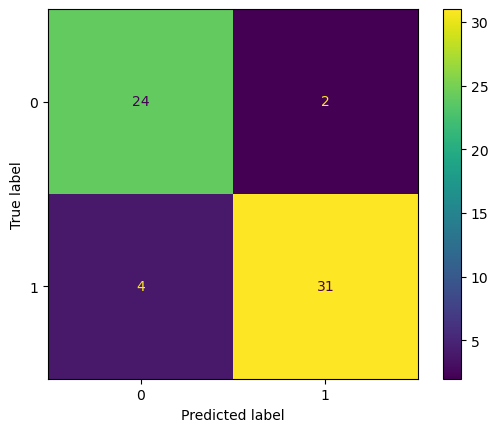

In [281]:
CM = ConfusionMatrixDisplay.from_estimator(KN_Classifier, x_test_scaled, y_test)
CM

### Random Forest

In [282]:
RF_Classifier = RandomForestClassifier()
start_time_rf = time.time()
RF_Classifier.fit(x_train_scaled,y_train)
end_time_rf = time.time()
time_taken_rf = end_time_rf - start_time_rf
print(f"Time taken to train Random Forest classifier: {time_taken_rf:.5f} seconds")

Time taken to train Random Forest classifier: 0.10755 seconds


In [283]:
print("Training Score:",RF_Classifier.score(x_train_scaled, y_train))
print("Test Score:",RF_Classifier.score(x_test_scaled,y_test))

Training Score: 1.0
Test Score: 0.9508196721311475


In [284]:
RF_prediction = RF_Classifier.predict(x_test_scaled)
RF_prediction

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1])

##### Comparing Expected vs Actual

In [285]:
predic_act = pd.DataFrame({'Expected': RF_prediction, 'Actual': y_test})
predic_act

,Expected,Actual
110,1,1
150,1,1
37,1,1
75,1,1
109,1,1
71,1,1
122,0,0
73,1,1
154,1,1
234,1,1


Now we are able to determine the **Accuracy** of the **Random Forest Classifier** and also visualize the evaluation metrics present in the report.

In [286]:
score = accuracy_score(y_test,RF_prediction)
report = classification_report(y_test,RF_prediction)

print("Random Forest")
print ("Accuracy Obtained: {:.5f}".format(score))
print (report)


Random Forest
Accuracy Obtained: 0.95082
              precision    recall  f1-score   support

           0       0.90      1.00      0.95        26
           1       1.00      0.91      0.96        35

    accuracy                           0.95        61
   macro avg       0.95      0.96      0.95        61
weighted avg       0.96      0.95      0.95        61



##### Plots and Confusion Matrix Visualization

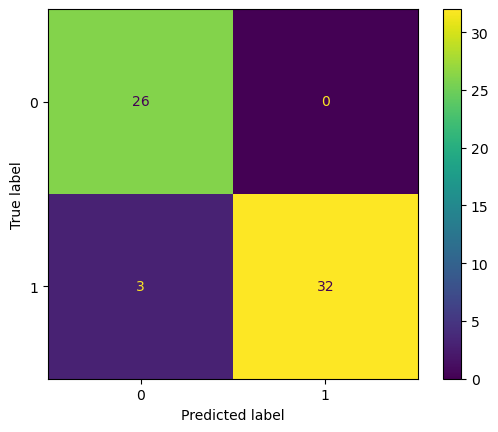

In [287]:
CM = ConfusionMatrixDisplay.from_estimator(RF_Classifier, x_test_scaled, y_test)
CM

### Model comparison based on Accuracy Score and Other Metrics

The `precision`, `recall`, `f1-score`, and `support` are metrics used to evaluate the performance of a classification model.

- `Precision` is the ratio of true positives to the total number of predicted positives. It measures how many of the predicted positive instances are actually positive.
- `Recall` is the ratio of true positives to the total number of actual positives. It measures how many of the actual positive instances are correctly identified by the classifier.
- `F1-score` is the harmonic mean of precision and recall. It takes both precision and recall into account and provides a single score that represents their balance.
- `Support` is the number of instances in each class.

The formulas for the metrics mentioned are:

- `Precision` = TP / (TP + FP)
- `Recall` = TP / (TP + FN)
- `F1-score` = 2 * (precision * recall) / (precision + recall)
- `Support` is simply the number of instances in each class.

Where:

- `TP`: True Positives
- `FP`: False Positives
- `FN`: False Negatives

In general, for the prediction problem we worked with, **high precision** would be desirable in order to minimize **false positives**, which could lead to unnecessary fire-fighting operations. **High recall** would also be important to minimize **false negatives**, which could result in delayed response times and increased damage to the forest. A **high F1-score** would indicate a good balance between precision and recall.
For instance, if the cost of false positives is very high, precision would be more important than recall. Conversely, if the cost of false negatives is very high, recall would be more important than precision.
Considering false positives and false negatives cost should be balanced, since both have negative impacts in our case scenario another metric should be taken into account - **accuracy score**. Accuracy score is another metric used to evaluate the performance of a classification model. It measures the proportion of instances that were correctly classified by the model.
- `Accuracy` = (TP + TN) / (TP + TN + FP + FN)


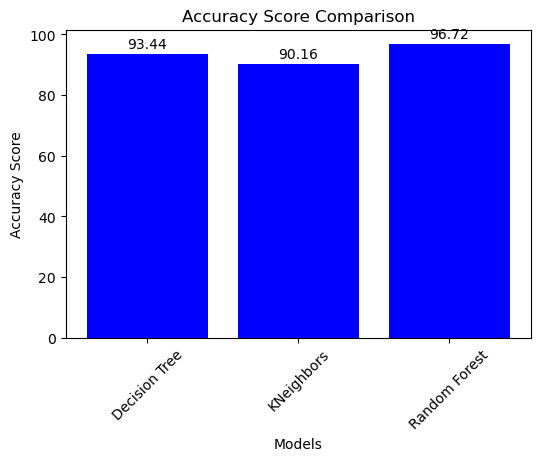

In [288]:
import matplotlib.pyplot as plt

models = ['Decision Tree','KNeighbors', 'Random Forest']
accuracy_scores = [93.44, 90.16, 96.72]
plt.figure(figsize=(6, 4))
plt.bar(models, accuracy_scores, color='blue')
for i, v in enumerate(accuracy_scores):
    plt.text(i, v + 1, str(v), ha='center', va='bottom', color='black')
plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Score Comparison')
plt.xticks(rotation=45)
plt.show()


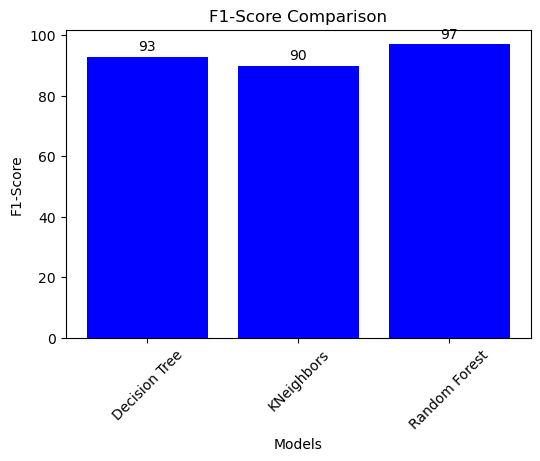

In [289]:
import matplotlib.pyplot as plt

models = ['Decision Tree','KNeighbors', 'Random Forest']
f1_scores = [93, 90, 97]
plt.figure(figsize=(6, 4))
plt.bar(models, f1_scores, color='blue')
for i, v in enumerate(f1_scores):
    plt.text(i, v + 1, str(v), ha='center', va='bottom', color='black')
plt.xlabel('Models')
plt.ylabel('F1-Score')
plt.title('F1-Score Comparison')
plt.xticks(rotation=45)
plt.show()

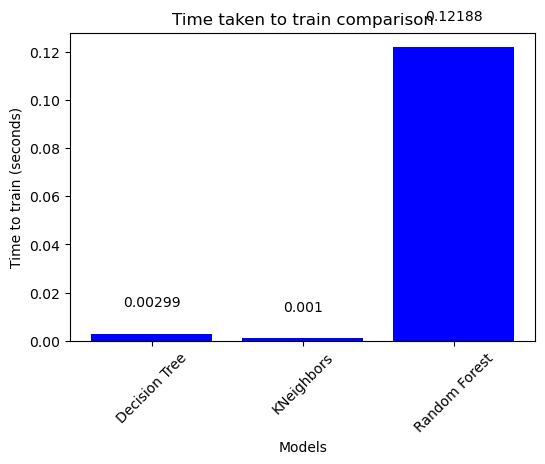

In [290]:
models = ['Decision Tree', 'KNeighbors', 'Random Forest']
time_spent = [0.00299, 0.00100, 0.12188]
plt.figure(figsize=(6, 4))
plt.bar(models, time_spent, color='blue')
for i, v in enumerate(time_spent):
    plt.text(i, v + 0.01, str(v), ha='center', va='bottom', color='black')
plt.xlabel('Models')
plt.ylabel('Time to train (seconds)')
plt.title('Time taken to train comparison')
plt.xticks(rotation=45)

plt.show()


##### Model choice based on results


Based on the evaluation metrics for each model and the specific problem at hand, it appears that the Random Forest classifier has the best performance.
- The **Random Forest classifier** has the highest accuracy score of 0.96721, indicating that it correctly predicted the class of 96.721% of the instances.
- The **Random Forest classifier** also has **high precision**, **recall**, and **F1-score** for both classes.
- The **Decision Tree classifier** comes in **second place**, with an accuracy score of 0.93443 and high precision, recall, and F1-score for both classes.
- The **K-nearest neighbors classifier** has the **lowest accuracy** score of 0.90164, though it still has high precision, recall, and F1-score for both classes.

Even though **Random Forest** classifier is the model that requires more time to train himself, overall, is the best performer among the three models, based on the evaluation metrics and the specific problem at hand. 